# Time-domain ODMR measurement

![frequency-shceduling](./figure/time-scheduling.jpg)


Import necessary modules and functions firstly

In [7]:
import matplotlib.pyplot as plt
from odmactor.scheduler import RamseyScheduler, RabiScheduler, RelaxationScheduler
from odmactor.utils.plotting import plot_ramsey, plot_rabi, plot_t1
import scipy.constants as C
import numpy as np


## Ramsey detection

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [12]:

t_start = 100
t_end = 4000
t_step = 20

pi_power = 10
pi_freq = 2.871 * C.giga
pi_time = 100 * C.nano

t_init = 1e3
inter_init_mw = 1e3
t_read_sig = 400
t_read_ref = t_read_sig

N = int(1e6 / 4)

**2. Construct a Ramsey Scheduler and run**

Especially, the calibrated MW $\pi$ pulse should be configured


In [13]:
scheduler = RamseyScheduler()
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, t_read_ref, inter_init_mw, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting('cbm')

scheduler.run_scanning()
scheduler.close()


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 'cbm', 'asg': 2}


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [ ]:
# observe detection sequence
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [ ]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

In [ ]:
plot_ramsey(counts_sig_ref[0], contrast)

## Rabi oscillation

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initilization time $t_{init}$, singal readout pulse time $t_{sig}$, etc.
- MW power $p$, MW frequency $f$
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [11]:

t_start = 20
t_end = 1000
t_step = 10

t_init = 3e3
inter_init_mw = 3000
inter_mw_read = 100

t_read_sig  = 800


N = int(1e6/2)

p = 16
f = 2.885 * C.giga

**2. Construct a Rabi measurement Scheduler and run**

In [12]:
scheduler = RabiScheduler(mw_ttl=0)
scheduler.configure_mw_paras(power=p, freq=f)
scheduler.configure_odmr_seq(t_init,  t_read_sig, inter_init_mw=inter_init_mw,inter_mw_read =inter_mw_read , N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting(reader='cbm')



# scheduler.asg_dwell


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


In [13]:
scheduler.run_scanning()

scheduler.close()



Begin to run Rabi Scheduler. Time intervals: 20.000 - 1000.000 ns.
N: 500000, n_times: 99
Estimated total running time: 50490.00 s
MW on/off status: True
scanning freq 20.000 ns
scanning freq 30.000 ns
scanning freq 40.000 ns
scanning freq 50.000 ns
scanning freq 60.000 ns
scanning freq 70.000 ns
scanning freq 80.000 ns
scanning freq 90.000 ns
scanning freq 100.000 ns
scanning freq 110.000 ns
scanning freq 120.000 ns
scanning freq 130.000 ns
scanning freq 140.000 ns
scanning freq 150.000 ns
scanning freq 160.000 ns
scanning freq 170.000 ns
scanning freq 180.000 ns
scanning freq 190.000 ns
scanning freq 200.000 ns
scanning freq 210.000 ns
scanning freq 220.000 ns
scanning freq 230.000 ns
scanning freq 240.000 ns
scanning freq 250.000 ns
scanning freq 260.000 ns
scanning freq 270.000 ns
scanning freq 280.000 ns
scanning freq 290.000 ns
scanning freq 300.000 ns
scanning freq 310.000 ns
scanning freq 320.000 ns
scanning freq 330.000 ns
scanning freq 340.000 ns
scanning freq 350.000 ns
scan

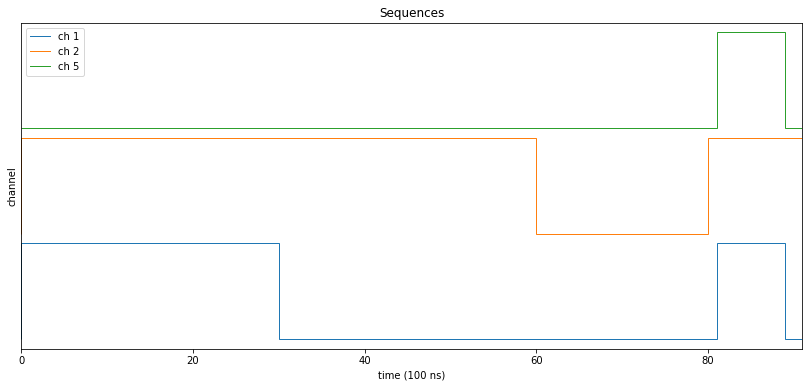

In [5]:
#fig = scheduler.sequences_figure


**3. Calculate contrast and plot figures**

In [14]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
# contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

Text(0, 0.5, 'counts')

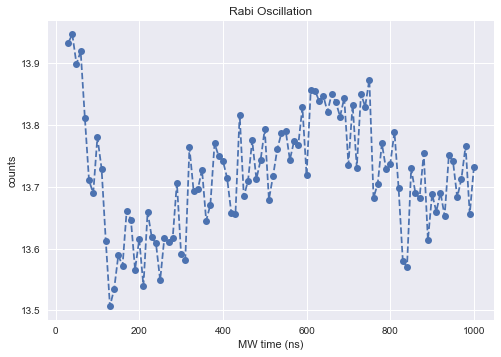

In [15]:
# plot_rabi(counts_sig_ref[0], counts_sig_ref[1])
plt.style.use('seaborn')

plt.plot(counts_sig_ref[0][1:], counts_sig_ref[1][1:], 'o--')
plt.title('Rabi Oscillation')
plt.xlabel('MW time (ns)')
plt.ylabel('counts')



## T1 relaxometry

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [ ]:

t_start = int(1e4)
t_end = int(1e6) 
t_step = int(2e3)

pi_power = 10
pi_freq = 2.871 * C.giga
pi_time = 100 * C.nano

t_init = 1e3
inter_init_mw = 1e3
t_read_sig = 400
t_read_ref = t_read_sig

N = int(1e6 / 4)

**Construct a T1 measurement scheduler and run**

In [ ]:
scheduler = RelaxationScheduler()
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, t_read_ref, inter_init_mw, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting('cbm')

scheduler.run_scanning()
scheduler.close()


In [ ]:
# observe sequence figure
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [ ]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

In [ ]:
plot_t1(counts_sig_ref[0], contrast)